# Introduction

This project will be divided into three main steps:

### Part 1: Preparing the dataset
Which is preparing the data, during which I will divide and prepare the features of the data so that they are suitable / ready to achieve the goals that I want.
### Part 2: Data Analysis Branch
Is to explore the data, during which I will work by touching on data analyzes and answering many questions, as well as explaining the results that I obtained from the analysis.
### Part 3: The recommendations
It is the recommendations that I deduced from previous analyzes regarding making an investment decision.

## Part 1: Preparing the dataset

## 1.0 Calling important libraries

In [1]:
# imporing some important libs

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# for errors
import warnings
warnings.filterwarnings("ignore")

## 1.1 Data overview

In [7]:
!pip install xls;
xls = pd.ExcelFile("Case Study-Amazon Orders Extract (1).xls")

  Using cached xls-0.1.1.tar.gz (58 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached PyV8-0.5.zip (22 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [8 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Aly_Mohammed\AppData\Local\Temp\pip-install-xnxvbobh\pyv8_ea3bce1dec1f489ba8f24d08d0d12c4f\setup.py", line 17, in <module>
      include_dirs += os.environ["INCLUDE"].split(';')
    File "E:\anaconda\lib\os.py", line 675, in __getitem__
      raise KeyError(key) from None
  KeyError: 'INCLUDE'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
# lodaing the data
xls = pd.ExcelFile("Case Study-Amazon Orders Extract (1).xls")

In [4]:
data = xls.parse(1)
people = xls.parse(2)
returns = xls.parse(3)

In [5]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [6]:
data.tail(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4,0.0,13.320
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948


In [7]:
data.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8651,8652,CA-2014-142769,2014-09-13,2014-09-13,Same Day,RP-19390,Resi Pölking,Consumer,United States,Seattle,...,98103,West,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,14.19,3,0.0,5.5341
6387,6388,CA-2014-134103,2014-01-30,2014-02-04,Standard Class,MV-18190,Mike Vittorini,Consumer,United States,Detroit,...,48234,Central,OFF-PA-10001204,Office Supplies,Paper,Xerox 1972,10.56,2,0.0,4.7520


In [8]:
print(f"The shape of the data is:{data.shape}")

The shape of the data is:(9994, 21)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

## 1.2 Data/Features Engineering

**Now I will make a change to the type of some columns as a prelude to extracting some other data.**

In [10]:
print(data["Order Date"].dtypes)
print(data["Ship Date"].dtypes)

datetime64[ns]
datetime64[ns]


In [11]:
data["Order Date"] = data["Order Date"].astype(str)
data["Ship Date"] = data["Ship Date"].astype(str)

In [12]:
print(data["Order Date"].dtypes)
print(data["Ship Date"].dtypes)

object
object


In [13]:
data["Ship Date"].head()

0    2016-11-11
1    2016-11-11
2    2016-06-16
3    2015-10-18
4    2015-10-18
Name: Ship Date, dtype: object

In [14]:
# split the columns 
# defining some function to help me in features engineering 
def year(x):
    return x.split("-")[0]

def month(x):
    return x.split("-")[1]

def day(x):
    return x.split("-")[2]

In [15]:
# applying the function on the "Order Date" column

data["Order Date day"] = data["Order Date"].apply(day)
data["Order Date month"] = data["Order Date"].apply(month)
data["Order Date year"] = data["Order Date"].apply(year)

In [16]:
# applying the function on the "Ship Date" column

data["Ship Date day"] = data["Ship Date"].apply(day)
data["Ship Date month"] = data["Ship Date"].apply(month)
data["Ship Date year"] = data["Ship Date"].apply(year)

In [17]:
data.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Date day,Order Date month,Order Date year,Ship Date day,Ship Date month,Ship Date year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.96,2,0.0,41.9136,08,11,2016,11,11,2016


In [18]:
# Take a look at the columns.
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Date day', 'Order Date month', 'Order Date year',
       'Ship Date day', 'Ship Date month', 'Ship Date year'],
      dtype='object')

In [19]:
# convert the data type for some columns
# Re-change the data type in some important columns.

data['Order Date day']=data['Order Date day'].astype(int)
data['Order Date month']=data['Order Date month'].astype(int)
data['Order Date year']=data['Order Date year'].astype(int)
data['Ship Date day']=data['Ship Date day'].astype(int)
data['Ship Date month']=data['Ship Date month'].astype(int)
data['Ship Date year']=data['Ship Date year'].astype(int)

**More mining and extraction of new columns.**

In [20]:
# Extract annual seasons and weeks

def quarter(x):
    if x <= 3:
        return(1)
    elif x <=6:
        return(2)
    elif x <= 9:
        return(3)
    else:
        return(4) 

In [21]:
# applying the function

data["quarters ord_year"] = data["Order Date month"].apply(quarter)
data["quarters ship_year"] = data["Ship Date month"].apply(quarter)

In [22]:
# get another column (week)

data['order week']=(((((data['Order Date month']-1)*30)+data['Order Date day'])/7)+1).astype(int)
data['Ship week']=(((((data['Ship Date month']-1)*30)+data['Ship Date day'])/7)+1).astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Row ID              9994 non-null   int64  
 1   Order ID            9994 non-null   object 
 2   Order Date          9994 non-null   object 
 3   Ship Date           9994 non-null   object 
 4   Ship Mode           9994 non-null   object 
 5   Customer ID         9994 non-null   object 
 6   Customer Name       9994 non-null   object 
 7   Segment             9994 non-null   object 
 8   Country             9994 non-null   object 
 9   City                9994 non-null   object 
 10  State               9994 non-null   object 
 11  Postal Code         9994 non-null   int64  
 12  Region              9994 non-null   object 
 13  Product ID          9994 non-null   object 
 14  Category            9994 non-null   object 
 15  Sub-Category        9994 non-null   object 
 16  Produc

In [24]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Order Date day,Order Date month,Order Date year,Ship Date day,Ship Date month,Ship Date year,quarters ord_year,quarters ship_year,order week,Ship week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,11,2016,11,11,2016,4,4,45,45
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,11,2016,11,11,2016,4,4,45,45
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,12,6,2016,16,6,2016,2,2,24,24


**Now I will extract some relationships between two columns and show some numbers.**

In [25]:
(data["Order Date day"] == data["Ship Date day"]).value_counts()

False    9475
True      519
dtype: int64

I will keep the 2 columns `Order Date day && Ship Date day`

In [26]:
(data["Order Date month"] == data["Ship Date month"]).value_counts()

True     8835
False    1159
dtype: int64

 I will keep the 2 columns `Order Date month && Ship Date month`

In [27]:
(data["Order Date year"] == data["Ship Date year"]).value_counts()

True     9842
False     152
dtype: int64

I will keep the 2 columns `Order Date year && Ship Date year`

In [28]:
(data["quarters ord_year"] == data["quarters ship_year"]).value_counts()

True     9563
False     431
dtype: int64

I will keep the 2 columns `quarters ord_year && quarters ship_year`

In [29]:
# Re-change the column type to its original one that you previously changed in the first place. 

data['Order Date']= pd.to_datetime(data['Order Date'])
data['Ship Date']= pd.to_datetime(data['Ship Date'])

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Row ID              9994 non-null   int64         
 1   Order ID            9994 non-null   object        
 2   Order Date          9994 non-null   datetime64[ns]
 3   Ship Date           9994 non-null   datetime64[ns]
 4   Ship Mode           9994 non-null   object        
 5   Customer ID         9994 non-null   object        
 6   Customer Name       9994 non-null   object        
 7   Segment             9994 non-null   object        
 8   Country             9994 non-null   object        
 9   City                9994 non-null   object        
 10  State               9994 non-null   object        
 11  Postal Code         9994 non-null   int64         
 12  Region              9994 non-null   object        
 13  Product ID          9994 non-null   object      

**Now that data can be downloaded and used in any process such as data analysis or building machine learning algorithms and other tasks.**

In [31]:
# data.to_csv("Amazon.csv")

## Part 2: Data Analysis Branch

In [32]:
# If I want this later 
data1 = data.copy()

In [33]:
data.isnull().sum().any()

False

In [34]:
# orders date

data_sort = data.sort_values(by="Order Date")

In [35]:
data_sort.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Order Date day,Order Date month,Order Date year,Ship Date day,Ship Date month,Ship Date year,quarters ord_year,quarters ship_year,order week,Ship week
7980,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,3,1,2014,7,1,2014,1,1,1,2
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,4,1,2014,8,1,2014,1,1,1,2


### **What is the sales volume over the previous years?**

In [36]:
data_sort["Order Date year"].value_counts()

2017    3312
2016    2587
2015    2102
2014    1993
Name: Order Date year, dtype: int64

<AxesSubplot:>

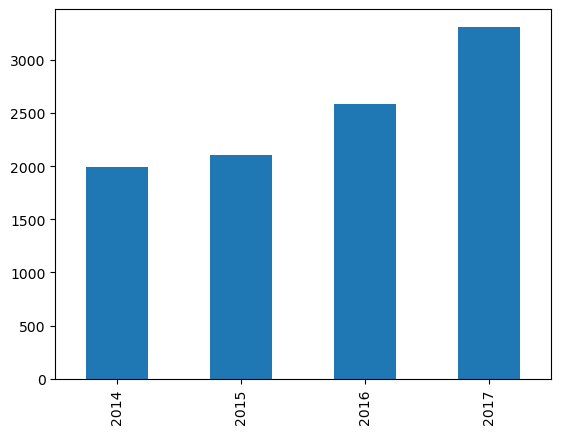

In [37]:
# explore the date--year
data_sort["Order Date year"].value_counts(ascending=True).plot(kind='bar')

<AxesSubplot:>

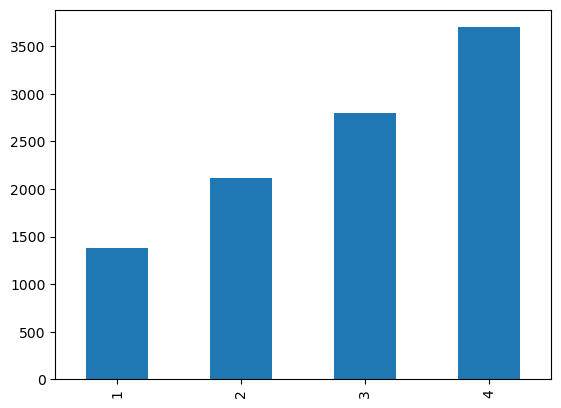

In [38]:
# explore the date--year
# This is for annual quarters

data_sort["quarters ord_year"].value_counts(ascending=True).plot(kind='bar')

<AxesSubplot:>

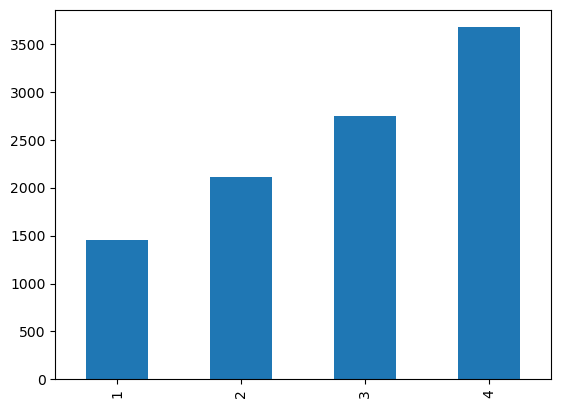

In [39]:
# quarters ship_year
data_sort["quarters ship_year"].value_counts(ascending=True).plot(kind='bar')

### **What is the volume of sales during the previous months?**

<AxesSubplot:>

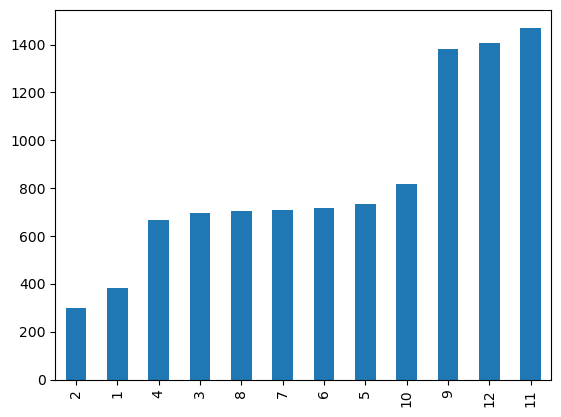

In [40]:
# explore the date--year
data_sort["Order Date month"].value_counts(ascending=True).plot(kind='bar')

<AxesSubplot:>

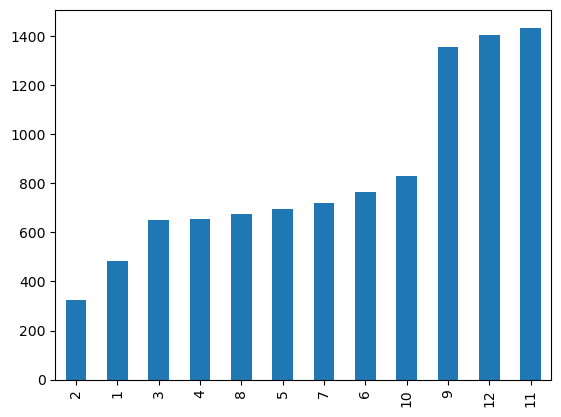

In [41]:
# explore the date--year
# shiping in diff monthes

data_sort["Ship Date month"].value_counts(ascending=True).plot(kind='bar')

### **What is the volume of sales during the previous weeks?**

In [42]:
data_sort["order week"].max()

52

<AxesSubplot:>

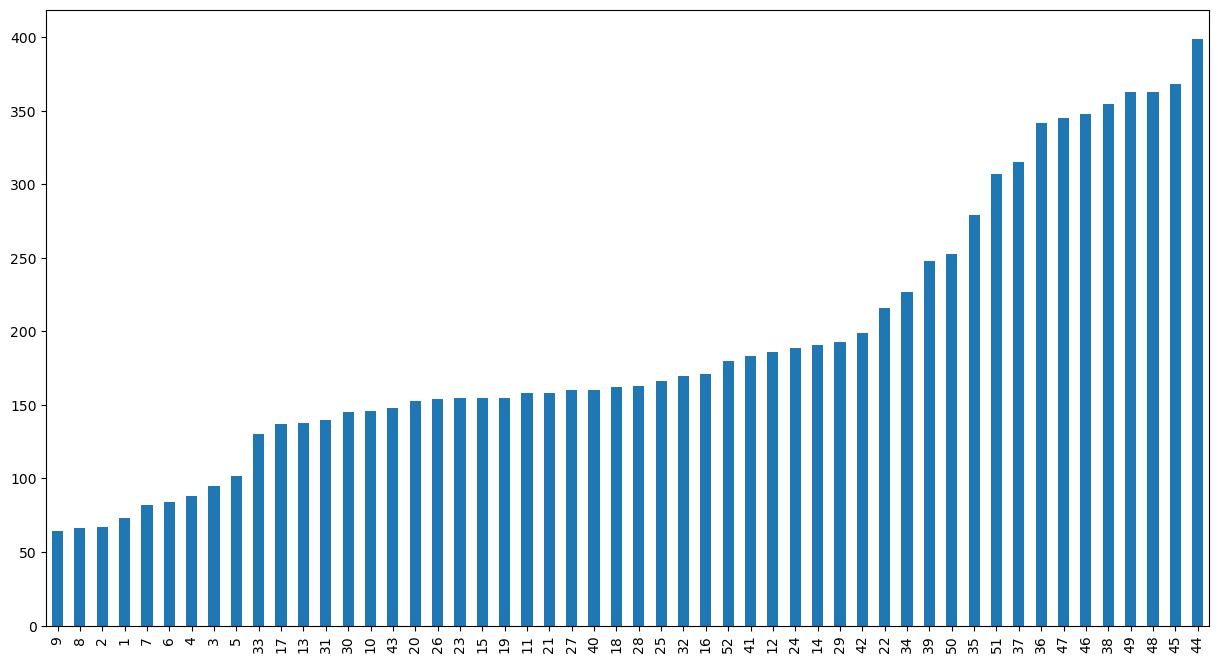

In [43]:
# order week
plt.figure(figsize=(15,8))
data_sort["order week"].value_counts(ascending=True).plot(kind='bar')

### **Sales volume during the fourth quarter of the year during all previous years?**

In [44]:
# Determine the most traded weeks during the last quarter of the year

ord_in_4_quer = data_sort[data_sort["quarters ord_year"]==4]
ord_in_4_quer.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Order Date day,Order Date month,Order Date year,Ship Date day,Ship Date month,Ship Date year,quarters ord_year,quarters ship_year,order week,Ship week
8705,8706,US-2014-132745,2014-10-01,2014-10-05,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Reno,...,1,10,2014,5,10,2014,4,4,39,40
3222,3223,CA-2014-108189,2014-10-02,2014-10-05,First Class,ES-14080,Erin Smith,Corporate,United States,Tempe,...,2,10,2014,5,10,2014,4,4,39,40
3224,3225,CA-2014-108189,2014-10-02,2014-10-05,First Class,ES-14080,Erin Smith,Corporate,United States,Tempe,...,2,10,2014,5,10,2014,4,4,39,40


<AxesSubplot:>

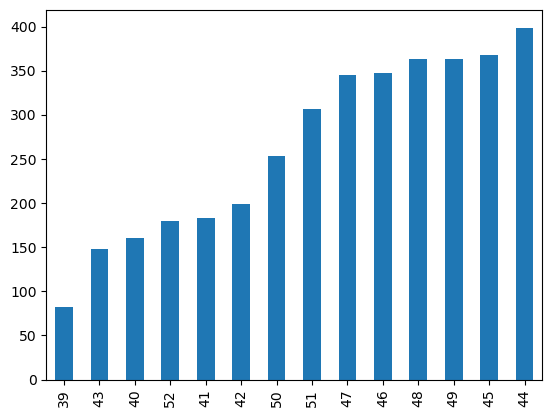

In [45]:
# Transactions during the last quarter of the year depending on the weeks
ord_in_4_quer["order week"].value_counts(ascending=True).plot(kind='bar')

<AxesSubplot:>

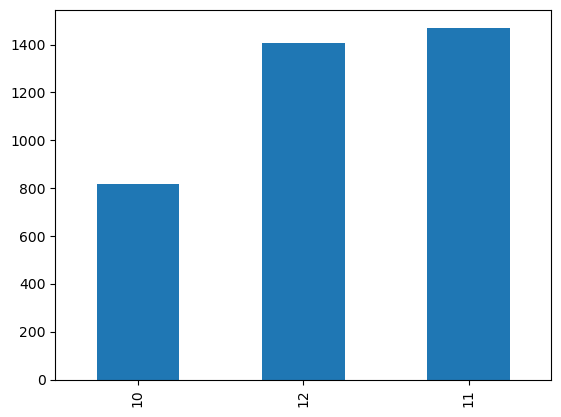

In [46]:
# Transactions during the last quarter of the year depending on the months
ord_in_4_quer["Order Date month"].value_counts(ascending=True).plot(kind='bar')

### **What are the main selling categories in recent years?**

In [47]:
data["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='Count'>

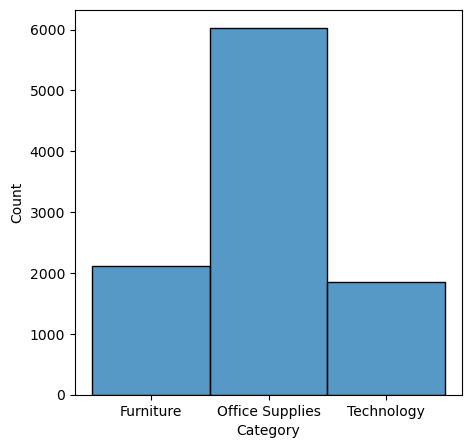

In [48]:
plt.figure(figsize=(5,5))
sns.histplot(data["Category"])

### **What are the best-selling categories during the previous years for each year separately?**

In [49]:
# devideing the year date into many years 

sub_2017 = data[(data["Order Date year"] == 2017) & (data["Ship Date year"] == 2017)]
sub_2016 = data[(data["Order Date year"] == 2016) & (data["Ship Date year"] == 2016)]
sub_2015 = data[(data["Order Date year"] == 2015) & (data["Ship Date year"] == 2015)]

<AxesSubplot:xlabel='Category', ylabel='Count'>

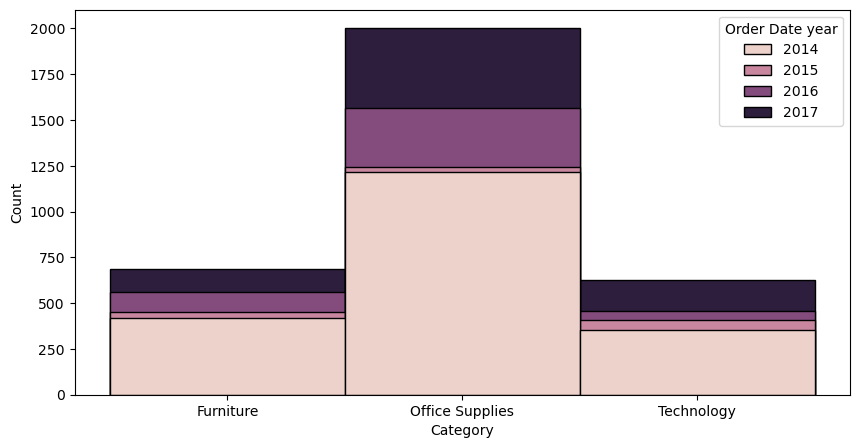

In [50]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = data["Category"],hue="Order Date year", fill=True,color='skyblue',alpha=1)

In [51]:
sub_2017.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Order Date day,Order Date month,Order Date year,Ship Date day,Ship Date month,Ship Date year,quarters ord_year,quarters ship_year,order week,Ship week
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,15,4,2017,20,4,2017,2,2,16,16
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,16,7,2017,18,7,2017,3,3,29,29
34,35,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,...,19,10,2017,23,10,2017,4,4,42,42


<AxesSubplot:xlabel='Count', ylabel='Category'>

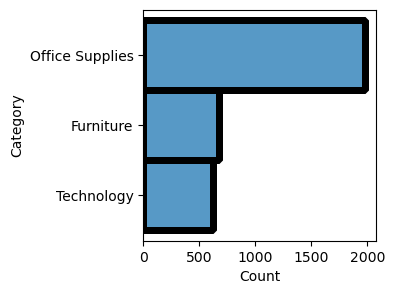

In [52]:
plt.figure(figsize=(3,3))
sns.histplot(y=sub_2017['Category'])

<AxesSubplot:xlabel='Count', ylabel='Category'>

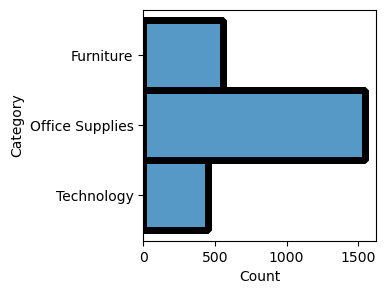

In [53]:
plt.figure(figsize=(3,3))
sns.histplot(y=sub_2016['Category'])

<AxesSubplot:xlabel='Count', ylabel='Category'>

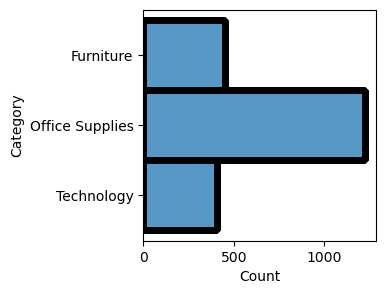

In [54]:
plt.figure(figsize=(3,3))
sns.histplot(y=sub_2015['Category'])

<AxesSubplot:xlabel='Category', ylabel='Count'>

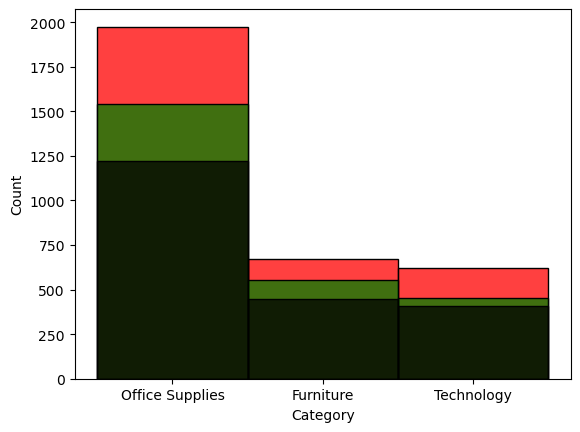

In [55]:
# note
sns.histplot(x=sub_2017["Category"], color="red")
sns.histplot(x=sub_2016["Category"], color="green")
sns.histplot(x=sub_2015["Category"], color="black")

### **What are the most selling categories during the annual quarters?**

<AxesSubplot:xlabel='quarters ord_year', ylabel='Count'>

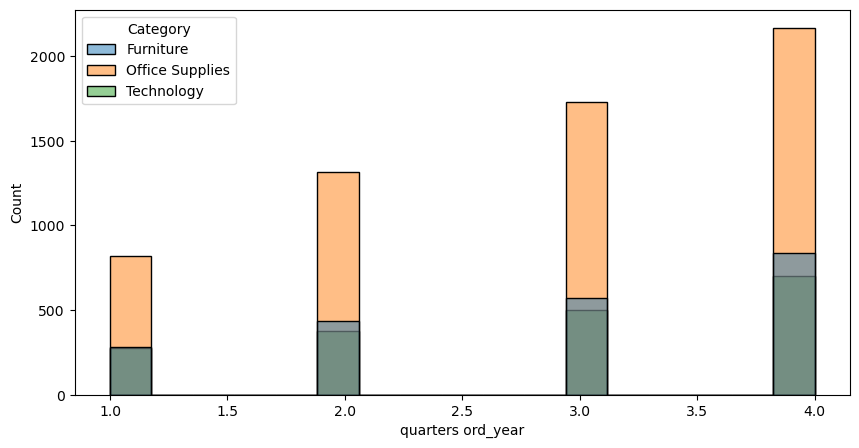

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, x = data["quarters ord_year"],hue="Category", fill=True)

<AxesSubplot:xlabel='Category', ylabel='Count'>

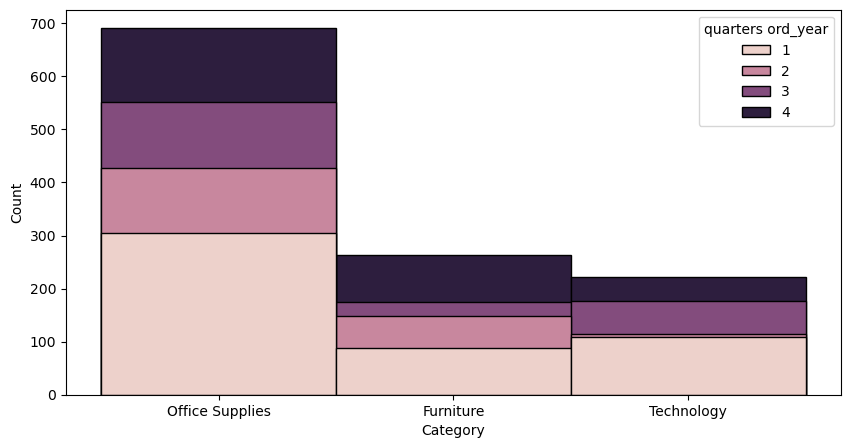

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data = sub_2017, x = sub_2017["Category"],hue="quarters ord_year", fill=True,color='skyblue',alpha=1)

In [58]:
sub_2017.groupby('Category')['quarters ord_year'].count().sort_values(ascending=False).head(5)

Category
Office Supplies    1975
Furniture           674
Technology          621
Name: quarters ord_year, dtype: int64

<AxesSubplot:xlabel='Category'>

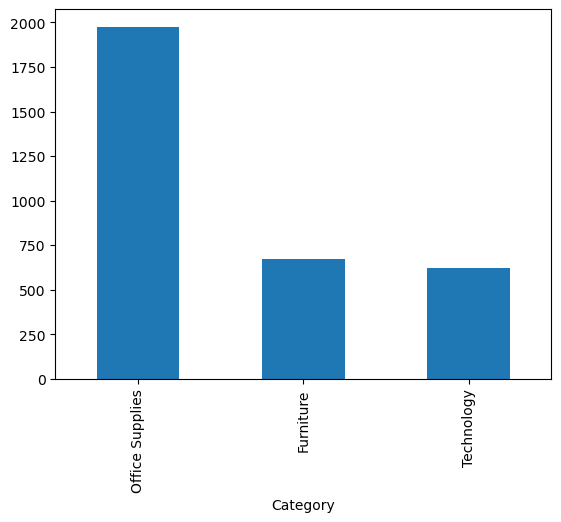

In [59]:
sub_2017.groupby('Category')['quarters ord_year'].count().sort_values(ascending=False).head(5).plot(kind='bar')

In [60]:
sub_2016.groupby('Category')['quarters ord_year'].count().sort_values(ascending=False).head(5)

Category
Office Supplies    1544
Furniture           555
Technology          455
Name: quarters ord_year, dtype: int64

In [61]:
sub_2015.groupby('Category')['quarters ord_year'].count().sort_values(ascending=False).head(5)

Category
Office Supplies    1222
Furniture           450
Technology          406
Name: quarters ord_year, dtype: int64

### **What are the most active months in sales during 2017?**

<AxesSubplot:xlabel='Order Date month', ylabel='Count'>

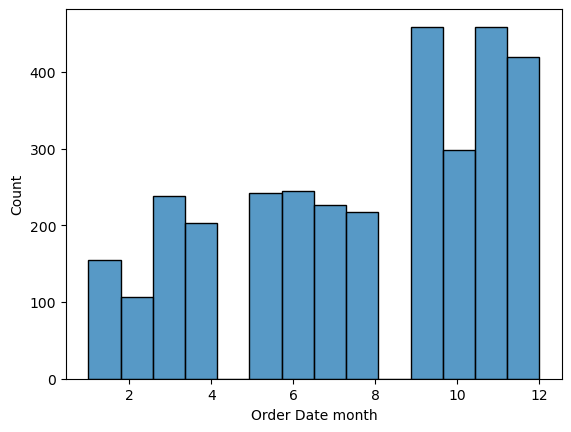

In [62]:
sns.histplot(sub_2017['Order Date month'])

The rate of demand for these three products reached its maximum from the month of 9 to the month of 12, but we notice a decrease in the rate of demand for these products during the month of 10, and this is normal because we have already noticed a decrease in the general level of demand during the month of 10, but it rises again in the rest Months.

### **What are the most active weeks in sales during 2017?**

In [63]:
sub_2017.groupby('order week')['Category'].count().sort_values(ascending=False).head(5)

order week
48    142
44    127
38    117
49    116
46    115
Name: Category, dtype: int64

<AxesSubplot:xlabel='order week'>

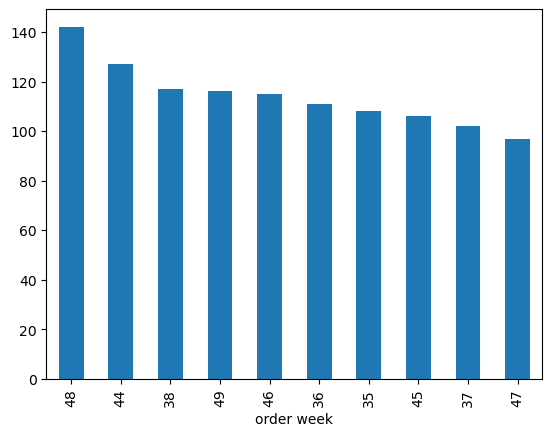

In [64]:
sub_2017.groupby('order week')['Category'].count().sort_values(ascending=False).head(10).plot(kind='bar')

### **What is the most active quarter in sales during 2017?**

In [65]:
sub_2017.groupby('quarters ord_year')['Category'].count().sort_values(ascending=False).head(5)

quarters ord_year
4    1177
3     903
2     690
1     500
Name: Category, dtype: int64

<AxesSubplot:xlabel='quarters ord_year'>

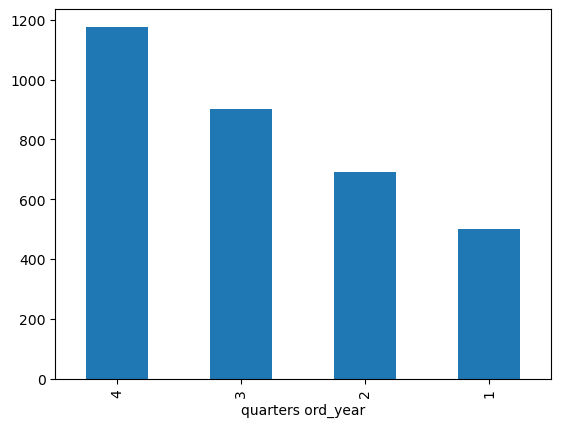

In [66]:
sub_2017.groupby('quarters ord_year')['Category'].count().sort_values(ascending=False).head(5).plot(kind='bar')

For the year 2017, from the first quarter of the year to the fourth quarter, a steady increase in the number of sales.

**Office Supplies increased its sales rate significantly in 2017, and every year witnesses a significant increase in it.
In the last quarter of the year, specifically from the month of 9 to the month of 12, sales are concentrated in that particular period, but the rest of the time of the year, sales are average.
Also, sales are concentrated from week No. 36 to week No. 48.**

In [67]:
data["Sub-Category"].head()

0    Bookcases
1       Chairs
2       Labels
3       Tables
4      Storage
Name: Sub-Category, dtype: object

In [68]:
# total sub Category
data["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [69]:
# divide the sub_Category

off_supply = data[data["Category"] == "Office Supplies"]
Furnit = data[data["Category"] == "Furniture"]
Tech = data[data["Category"] == "Technology"]

### **What is the best selling sub-category in the main category "Office Supplies"?**

In [70]:
off_supply["Sub-Category"].value_counts()

Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       190
Name: Sub-Category, dtype: int64

<AxesSubplot:xlabel='Sub-Category'>

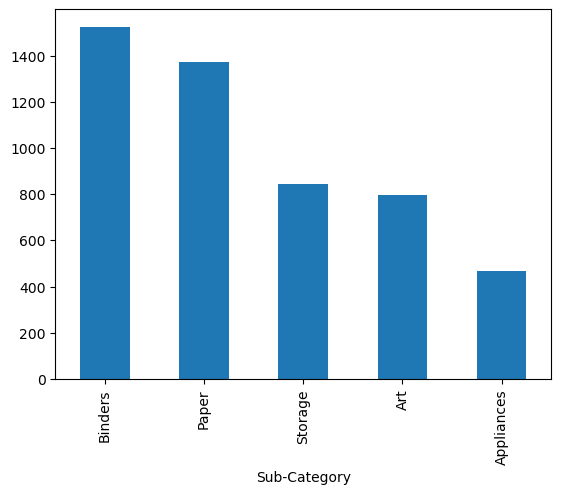

In [71]:
off_supply.groupby('Sub-Category')["Sales"].count().sort_values(ascending=False).head(5).plot(kind='bar')

### **What is the best selling sub-category in the main category "Furniture"?**

In [72]:
Furnit["Sub-Category"].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

<AxesSubplot:xlabel='Sub-Category'>

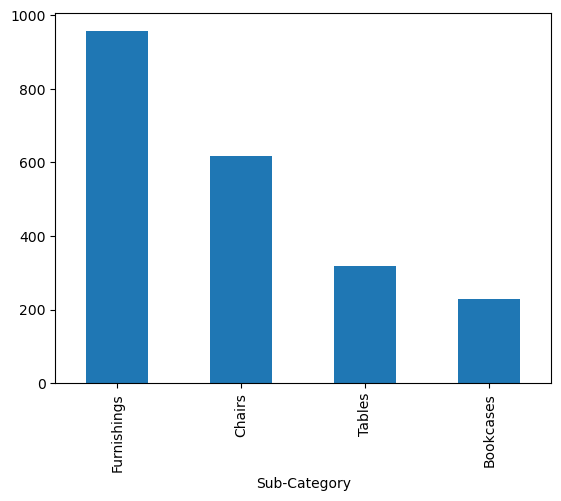

In [73]:
Furnit.groupby('Sub-Category')["Sales"].count().sort_values(ascending=False).head(5).plot(kind='bar')

### **What is the best selling sub-category in the main category "Technology"?**

In [74]:
Tech["Sub-Category"].value_counts()

Phones         889
Accessories    775
Machines       115
Copiers         68
Name: Sub-Category, dtype: int64

<AxesSubplot:xlabel='Sub-Category'>

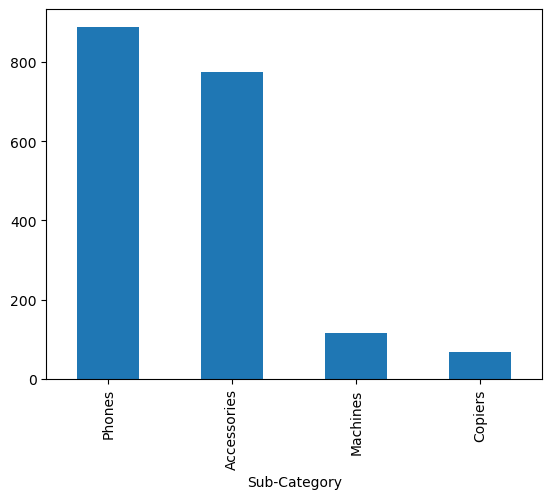

In [75]:
Tech.groupby('Sub-Category')["Sales"].count().sort_values(ascending=False).head(5).plot(kind='bar')

### **In general, what are the best-selling sub-categories among the main categories?**

<AxesSubplot:xlabel='Count', ylabel='Sub-Category'>

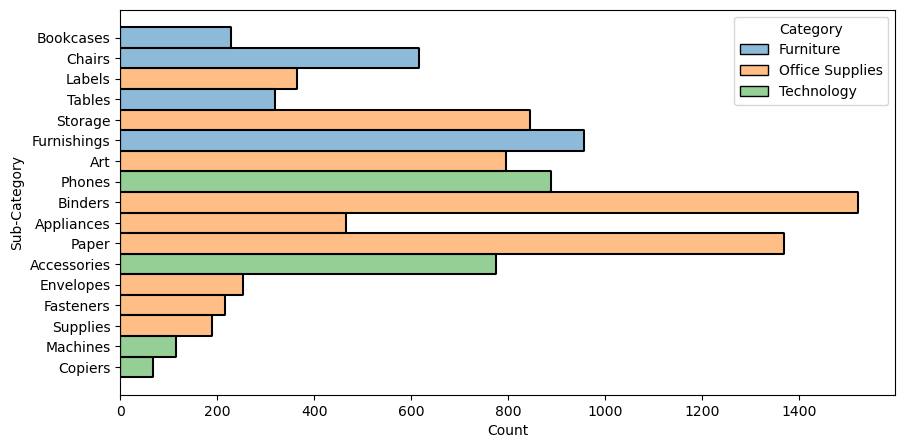

In [76]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, y = data["Sub-Category"],hue="Category", fill=True)

### **In general, what are the best-selling sub-categories among the main categories with different years' information?**

<AxesSubplot:xlabel='Count', ylabel='Sub-Category'>

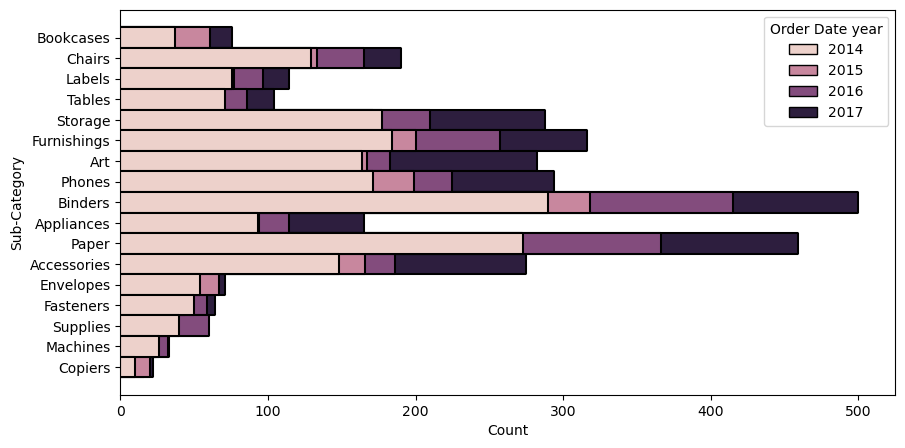

In [77]:
plt.figure(figsize=(10,5))
sns.histplot(data = data, y = data["Sub-Category"],hue="Order Date year", fill=True,alpha=1)

**It is an interesting thing that we note from those previous figures that the number of categories in Office Supplies is very many compared to Furniture and Technology, and therefore this may be a justification for the number of sales increasing dramatically in recent years for Office Supplies.**

<AxesSubplot:xlabel='Sub-Category', ylabel='Count'>

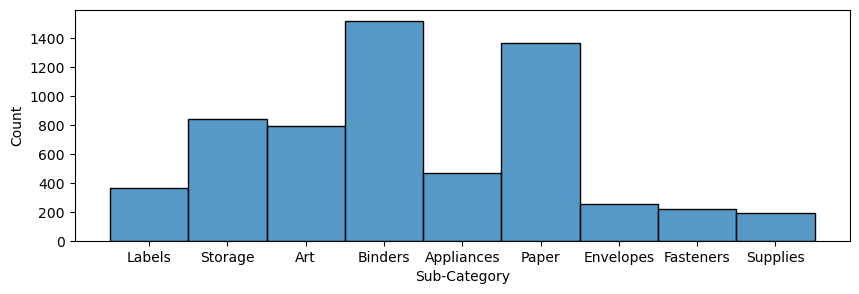

In [78]:
# trend Sub_Category in the Office Supplies

plt.figure(figsize=(10,3))
sns.histplot(off_supply['Sub-Category'])

### **The volume of sales in the sub-categories in relation to the main category, with information from previous years?**

<AxesSubplot:xlabel='Count', ylabel='Sub-Category'>

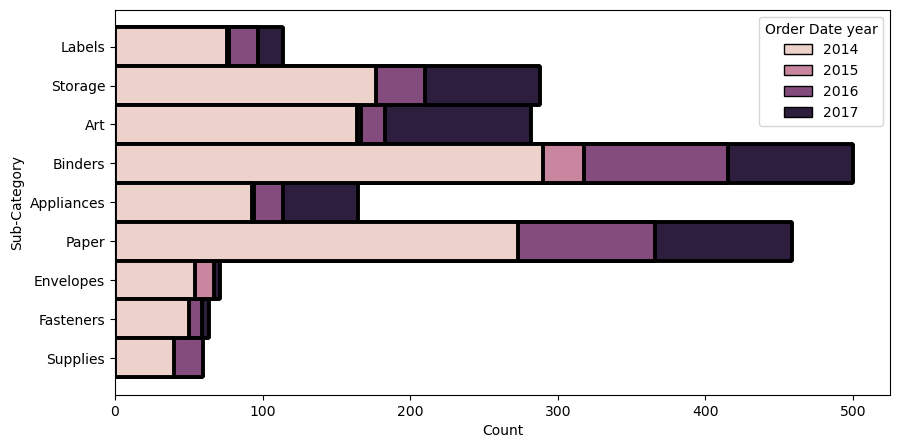

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(data = off_supply, y = off_supply["Sub-Category"],hue="Order Date year", fill=True,alpha=1)

**We note that binders and papers are the best-selling categories in the main Office Supplies category.**

<AxesSubplot:xlabel='Count', ylabel='Sub-Category'>

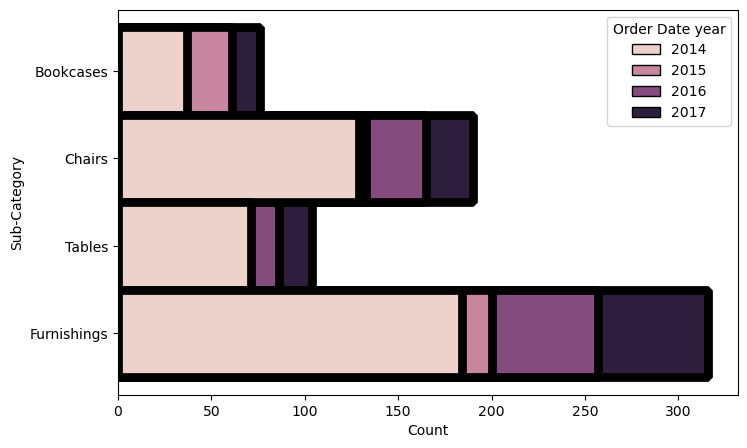

In [80]:
plt.figure(figsize=(8,5))
sns.histplot(data = Furnit, y = Furnit["Sub-Category"],hue="Order Date year", fill=True,alpha=1)

**We note that Furnishings and Chairs are the best-selling categories in the main Furniture category.**

<AxesSubplot:xlabel='Count', ylabel='Sub-Category'>

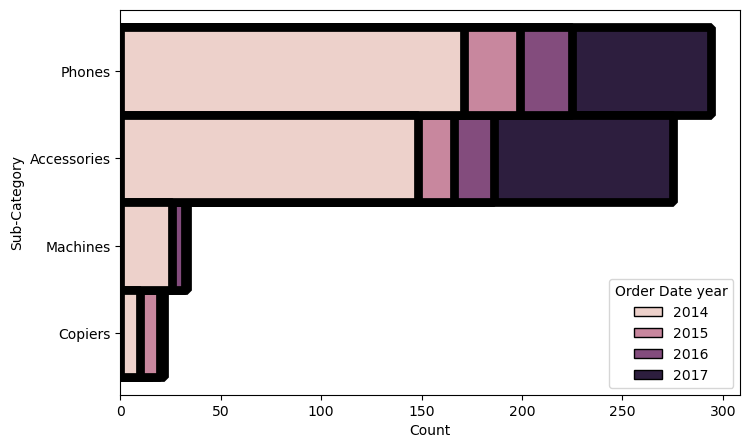

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(data = Tech, y = Tech["Sub-Category"],hue="Order Date year", fill=True,alpha=1)

**We note that phones and accessories are the best-selling categories in the main category, Technology.**

### **Most active months in sales for the main category "Office Supplies"?**

<AxesSubplot:xlabel='Order Date month', ylabel='Count'>

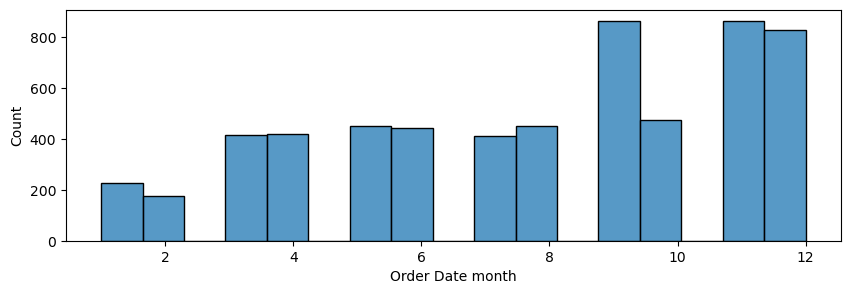

In [82]:
# regarding to the time 

plt.figure(figsize=(10,3))
sns.histplot(off_supply['Order Date month'])

**Sales rates increase in the last quarter of the year, specifically from the month of 9 to the 12th month.
Also, the same thing, we notice a decrease in sales in the month of 10.**

### **The most active quarter of sales in the main category "Office Supplies"?**

<AxesSubplot:xlabel='quarters ord_year', ylabel='Count'>

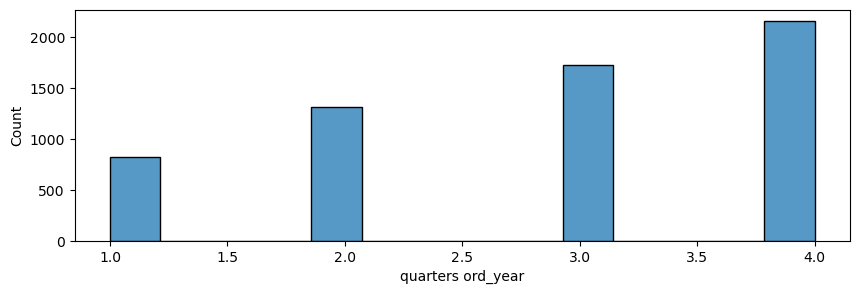

In [83]:
plt.figure(figsize=(10,3))
sns.histplot(off_supply['quarters ord_year'])

### **Sales status during the different months for the main category "Office Supplies"?**

<AxesSubplot:xlabel='order week', ylabel='Count'>

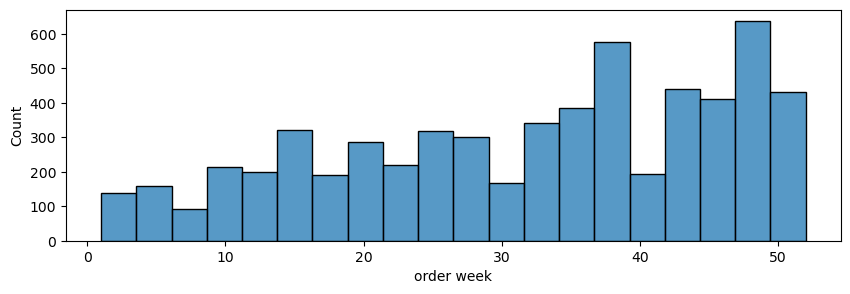

In [84]:
plt.figure(figsize=(10,3))
sns.histplot(off_supply['order week'])

**The sales rate increases from week No. 33 to week No. 53, and this supports to a large extent what we referred to above, which is a sharp increase in sales starting from the 36th week, week No. 48 of 2017.**

### **What is the sales status of the subcategories of the "Office Supplies" category?**

<AxesSubplot:xlabel='Sub-Category', ylabel='Count'>

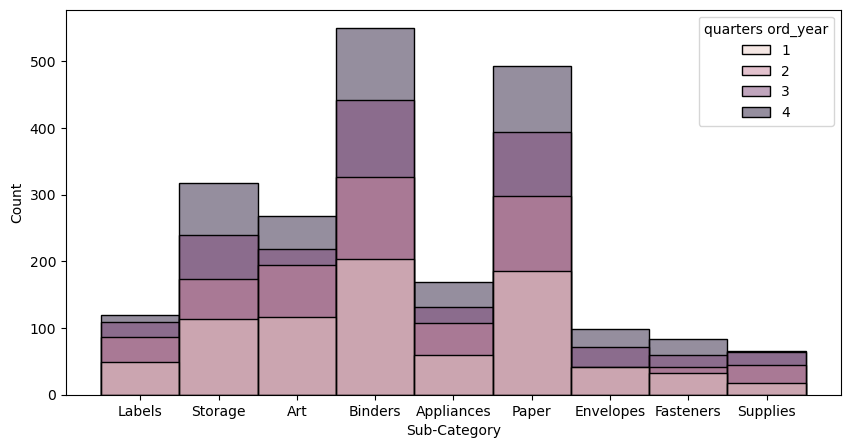

In [85]:
plt.figure(figsize=(10,5))
sns.histplot(data = off_supply, x = off_supply["Sub-Category"],hue="quarters ord_year", fill=True)

In [86]:
data["City"].value_counts().head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

### **What are the cities that contributed the most to the total sales volume during the previous years?**

<AxesSubplot:xlabel='City'>

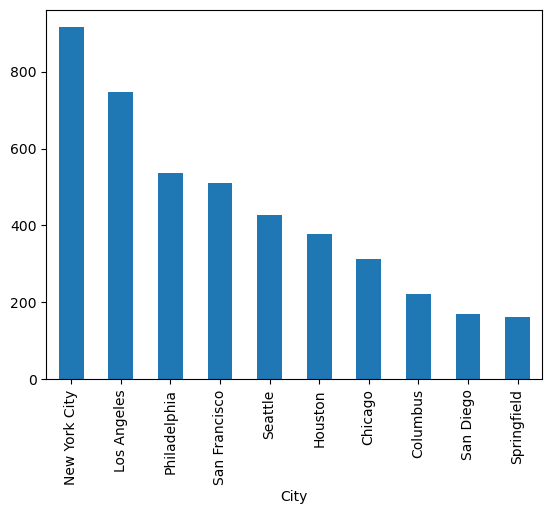

In [87]:
data.groupby('City')['Sales'].count().sort_values(ascending=False).head(10).plot(kind='bar')

**In general, New York City is the highest state in terms of sales during the previous four years, but if we look during each year, we will notice that New York state sales increase and decrease according to the factors that affect them.**

In [88]:
sub_2017.groupby('City')['Sales'].count().sort_values(ascending=False).head(15)

City
New York City    299
Los Angeles      208
San Francisco    189
Philadelphia     182
Seattle          181
Chicago          114
Houston          104
Columbus          81
Dallas            65
Springfield       45
Jacksonville      45
Richmond          42
San Diego         33
Detroit           29
Jackson           26
Name: Sales, dtype: int64

### **What are the cities that contributed the most to the total sales volume during the previous years, in detail?**

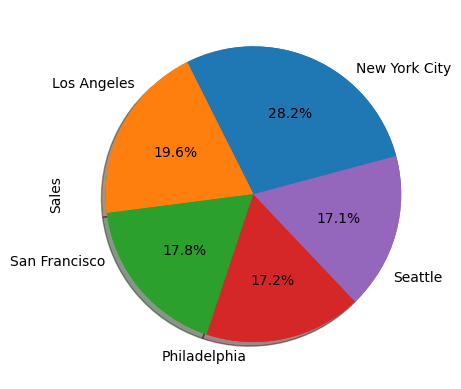

In [89]:
sub_2017.groupby('City')['Sales'].count().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(sub_2017.groupby('City')['Sales'].count().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=15);

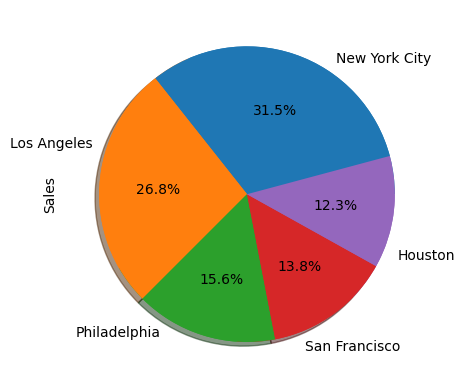

In [90]:
sub_2016.groupby('City')['Sales'].count().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(sub_2016.groupby('City')['Sales'].count().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=15);

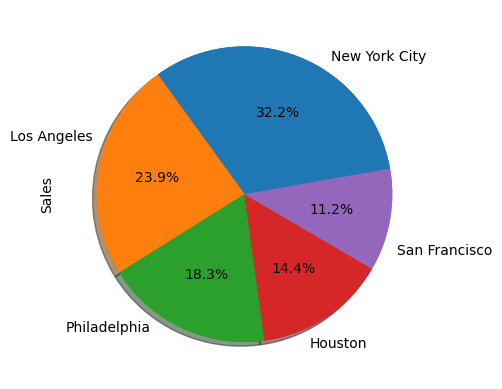

In [91]:
sub_2015.groupby('City')['Sales'].count().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(sub_2015.groupby('City')['Sales'].count().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=10);

In [92]:
sub_2014 = data[(data["Order Date year"] == 2014)]

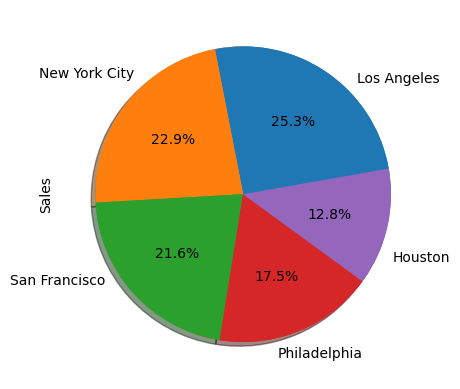

In [93]:
sub_2014.groupby('City')['Sales'].count().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(sub_2014.groupby('City')['Sales'].count().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=10);

**There is a very important factor that helps determine the most influential cities in profits, which is the profit and Discount factors for each of the states.**

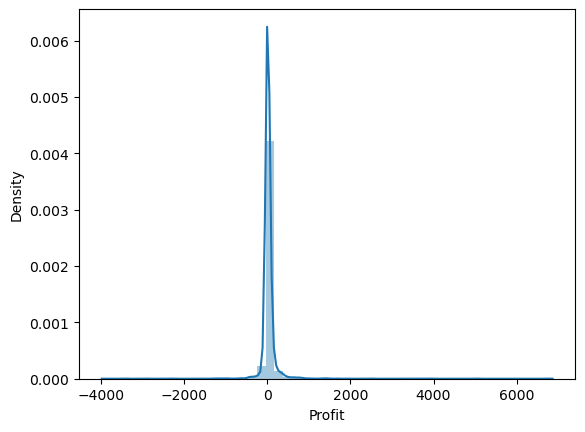

In [94]:
sns.distplot(sub_2017["Profit"]);

In [95]:
sub_2017["Profit"].max(), sub_2017["Profit"].min()

(6719.980799999999, -3839.9903999999988)

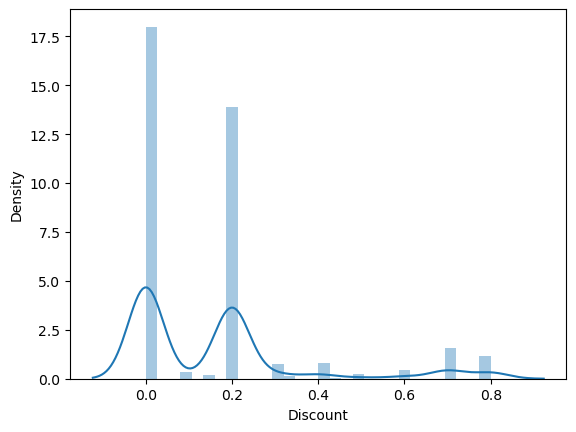

In [96]:
sns.distplot(sub_2017["Discount"]);

In [97]:
sub_2017["Discount"].min(), sub_2017["Discount"].max()

(0.0, 0.8)

In [98]:
sub_2017["Discount"].value_counts()

0.00    1569
0.20    1210
0.70     138
0.80     103
0.40      69
0.30      67
0.60      37
0.10      28
0.50      19
0.15      16
0.32      10
0.45       4
Name: Discount, dtype: int64

### **What are the cities that contribute the most to the total volume of profits?**

In [99]:
data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10)

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Name: Profit, dtype: float64

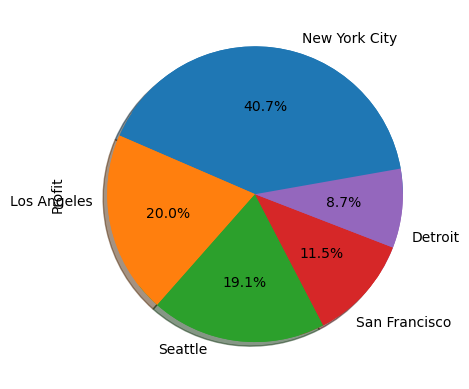

In [100]:
data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(data.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=10);

**New York State is the largest source of profit, but we have to dig a little deeper into the last two years to see if New York State is still the main source of profit.**

### **Which cities contributed the most to the total volume of profits during 2017?**

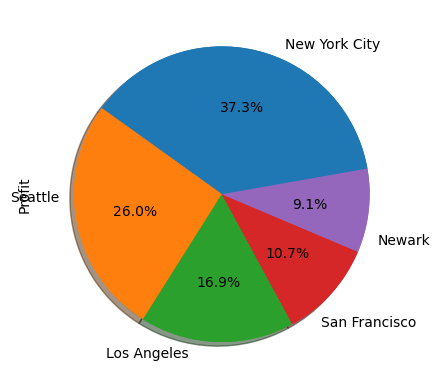

In [101]:
sub_2017.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(sub_2017.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=10);

### **Which cities contributed the most to the total volume of profits during 2014?**

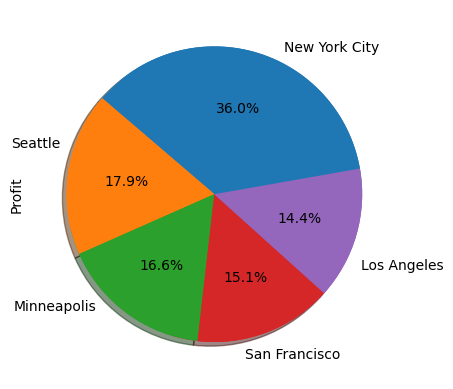

In [102]:
sub_2014.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(sub_2014.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=10);

**And this is what I really wanted to make sure of, which is that there is a significant impact on profits by state. New York city in 2014 came in second place in terms of the number of sales, but now in 2014 it also records the highest city in revenues.**

**Therefore, the city of New York is very, very important, not the category of customers in which it is important, because they pay more than any other cities.**

**Now, what is the share of each city in terms of Discount?**

In [103]:
data.groupby('City')['Discount'].sum().sort_values(ascending=False).head(10)

City
Philadelphia     175.50
Houston          143.14
Chicago          120.50
Dallas            56.30
Los Angeles       55.50
New York City     51.40
Columbus          38.50
Jacksonville      35.85
San Francisco     34.00
Seattle           27.80
Name: Discount, dtype: float64

### **What are the cities that consumed the most discounts during the previous years?**

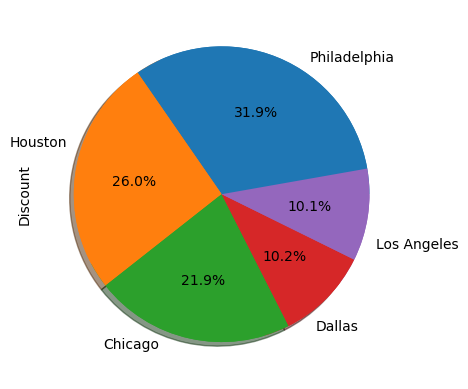

In [104]:
data.groupby('City')['Discount'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(data.groupby('City')['Discount'].sum().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=10);

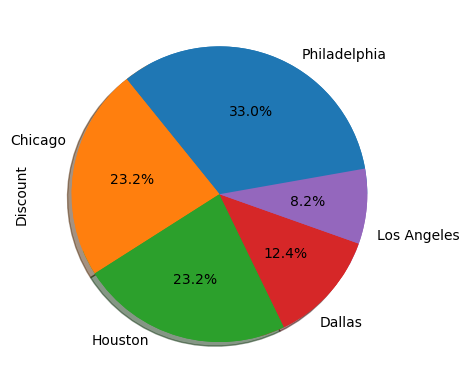

In [105]:
sub_2017.groupby('City')['Discount'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(sub_2017.groupby('City')['Discount'].sum().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=10);

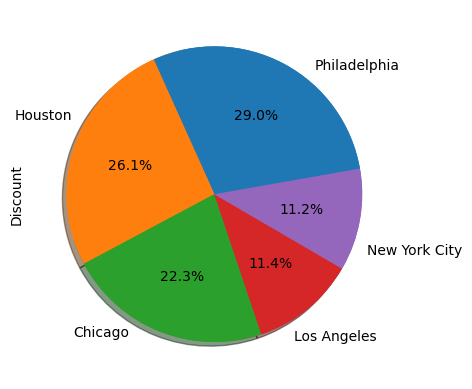

In [106]:
sub_2016.groupby('City')['Discount'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(sub_2016.groupby('City')['Discount'].sum().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=10);

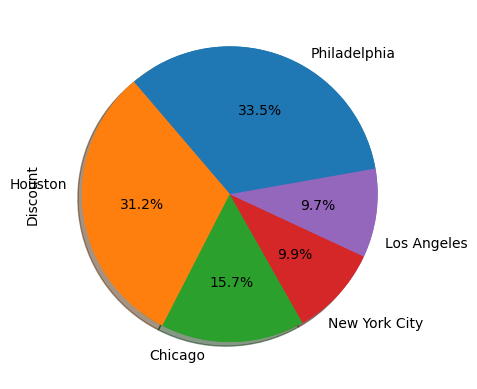

In [107]:
sub_2015.groupby('City')['Discount'].sum().sort_values(ascending=False).head(5).plot(kind='pie')
plt.pie(sub_2015.groupby('City')['Discount'].sum().sort_values(ascending=False).head(5), autopct='%1.1f%%', explode=[0,0,0,0,0], shadow=True, startangle=10);

**Those are the cities with the highest discount rate, generally once and during 2017, 2016 and 2015.**

**Each state includes many large cities.**

In [108]:
data["State"].value_counts().head(5)

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: State, dtype: int64

In [109]:
data.groupby('State')['City'].count().sort_values(ascending=False).head(5)

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: City, dtype: int64

### **What are the most influential states in the volume of sales during the previous years?**

<AxesSubplot:xlabel='State'>

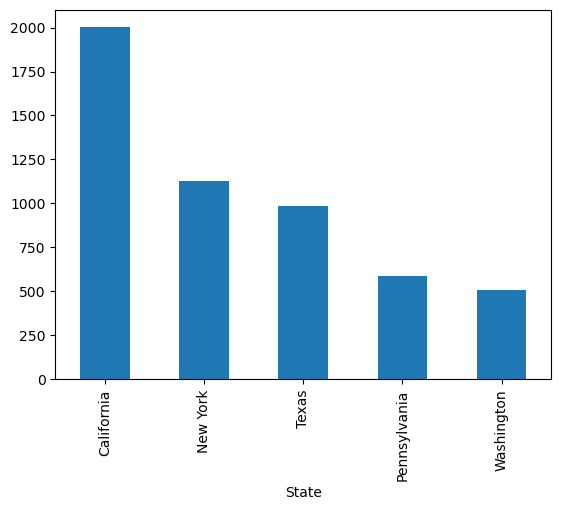

In [110]:
data.groupby('State')['Sales'].count().sort_values(ascending=False).head(5).plot(kind='bar')

### **What are the most influential states in the volume of total profits during the previous years?**

<AxesSubplot:xlabel='State'>

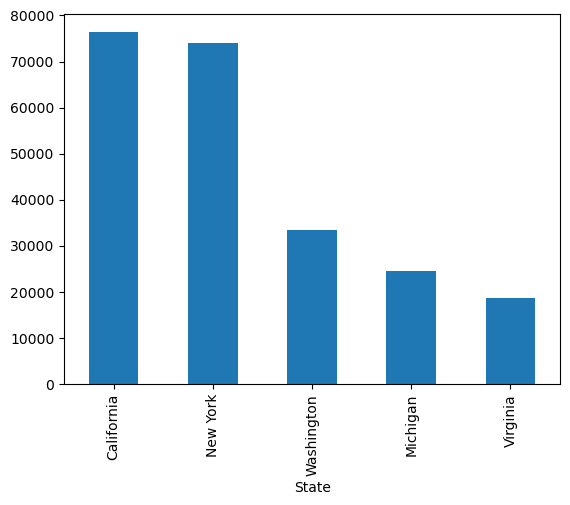

In [111]:
# Sales
data.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

**It seems that California and New York are close in terms of the total profit rate during the previous years.**

### **What are the states that consumed the most discounts during the previous years?**

<AxesSubplot:xlabel='State'>

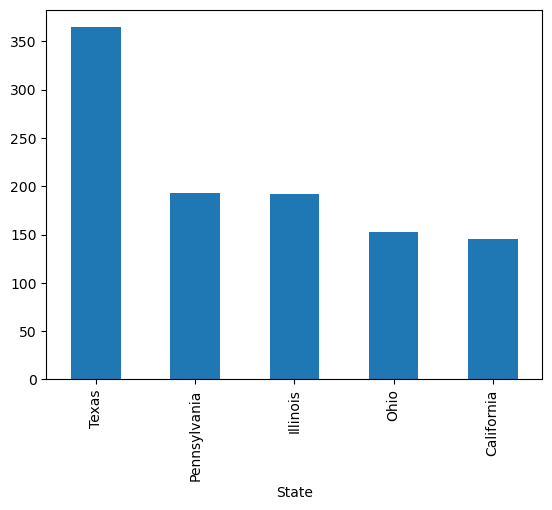

In [112]:
# Discount
data.groupby('State')['Discount'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

**It seems that Texas is the highest state in terms of the size of the discount in it.**

### **What are the most selling categories for each state during the previous years?**

<AxesSubplot:ylabel='Category'>

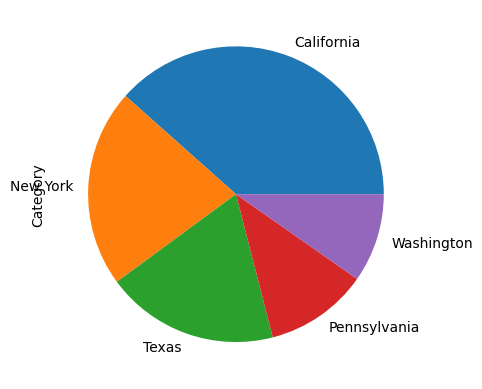

In [113]:
# top Category by state
data.groupby('State')['Category'].count().sort_values(ascending=False).head(5).plot(kind='pie')

<AxesSubplot:xlabel='Count', ylabel='State'>

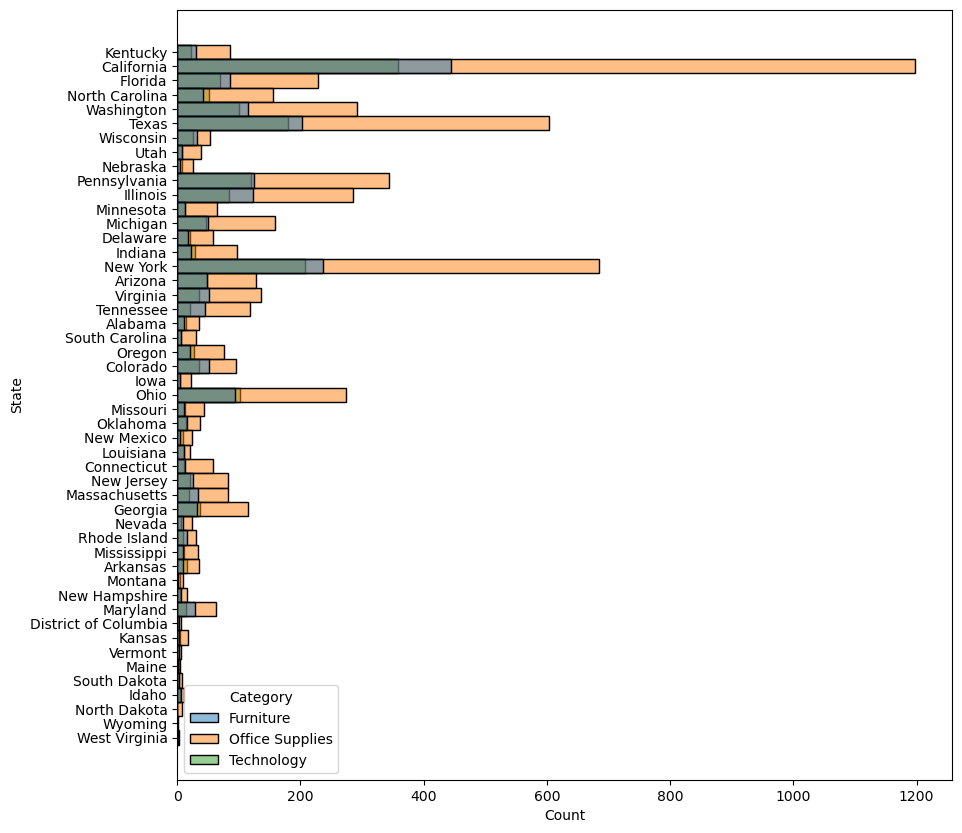

In [114]:
plt.figure(figsize=(10,10))
sns.histplot(data = data, y= data["State"] ,hue="Category", fill=True)

**From the figure, we note that the office supplies are the best-selling and widespread in all states.**

In [115]:
# Region
data["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

### **Which Region has the most states? Because I am not American.**

<AxesSubplot:xlabel='Region'>

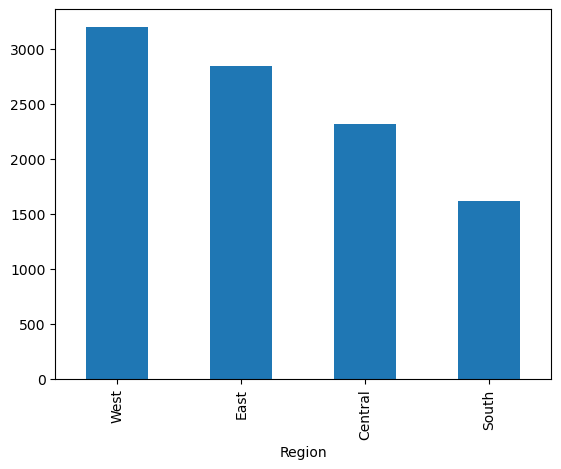

In [116]:
data.groupby('Region')['State'].count().sort_values(ascending=False).head(5).plot(kind='bar')

### **What is the most influential region in total profits?**

<AxesSubplot:xlabel='Region'>

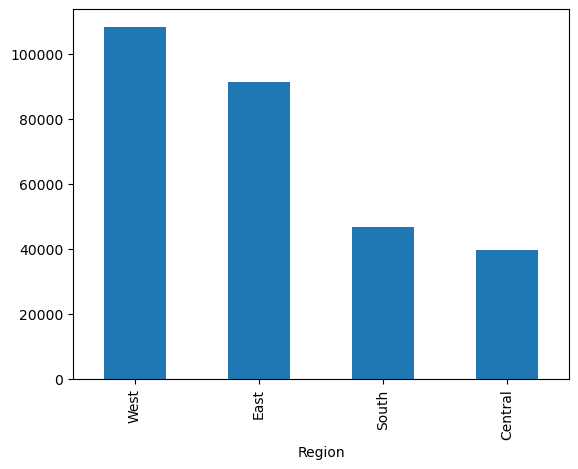

In [117]:
data.groupby('Region')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

### **What is the region that consumes the most discounts?**

<AxesSubplot:xlabel='Region'>

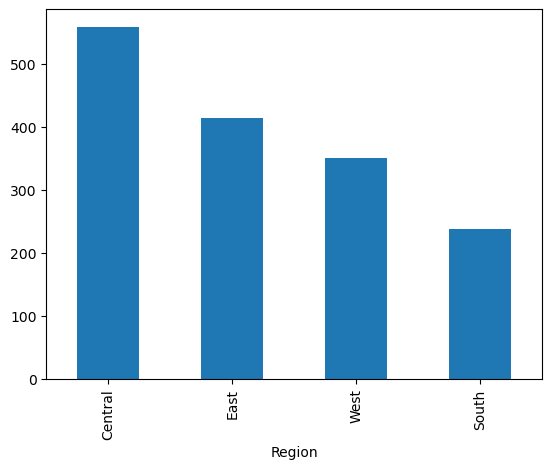

In [118]:
data.groupby('Region')['Discount'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

**We note that the states that are located in the middle are the states that are assigned a percentage in the discount.**

### **What is the most influential region for sales volume?**

<AxesSubplot:xlabel='Region'>

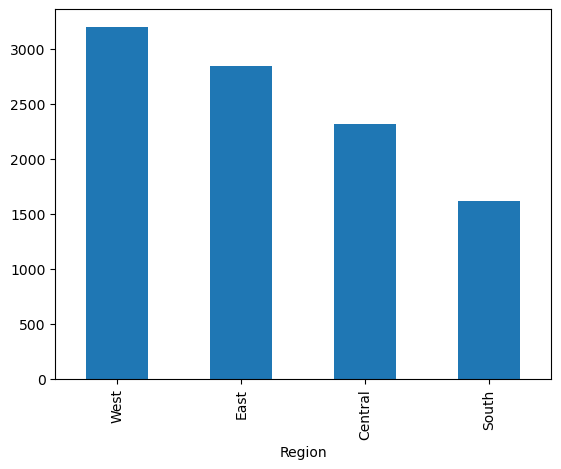

In [119]:
# Sales
data.groupby('Region')['Sales'].count().sort_values(ascending=False).head(5).plot(kind='bar')

**We note that the western states contain the highest rates of sale and also profit, and they also include the highest cities that reap the highest profits.**

In [120]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Date day', 'Order Date month', 'Order Date year',
       'Ship Date day', 'Ship Date month', 'Ship Date year',
       'quarters ord_year', 'quarters ship_year', 'order week', 'Ship week'],
      dtype='object')

### **What are the main selling categories for each region?**

<AxesSubplot:ylabel='Category'>

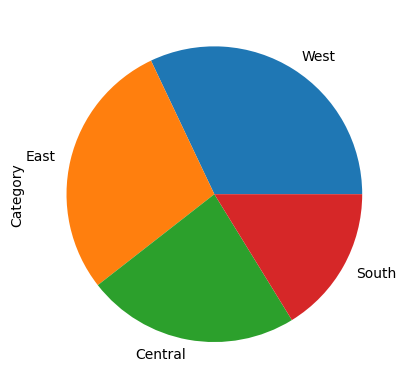

In [121]:
# top categories by region

data.groupby('Region')['Category'].count().sort_values(ascending=False).plot(kind='pie')

**In the West, the highest percentage of sales for different categories of products was recorded.**

<AxesSubplot:xlabel='Region', ylabel='Count'>

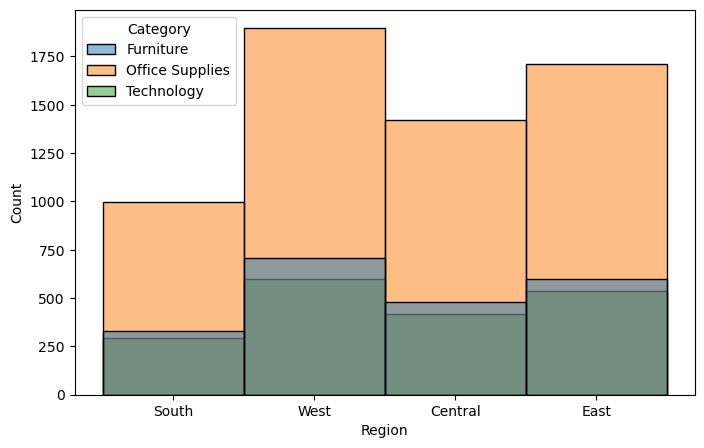

In [122]:
plt.figure(figsize=(8,5))
sns.histplot(data = data, x = data["Region"],hue="Category", fill=True)

### **What is the most influential segment on sales volume?**

In [123]:
data["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment'>

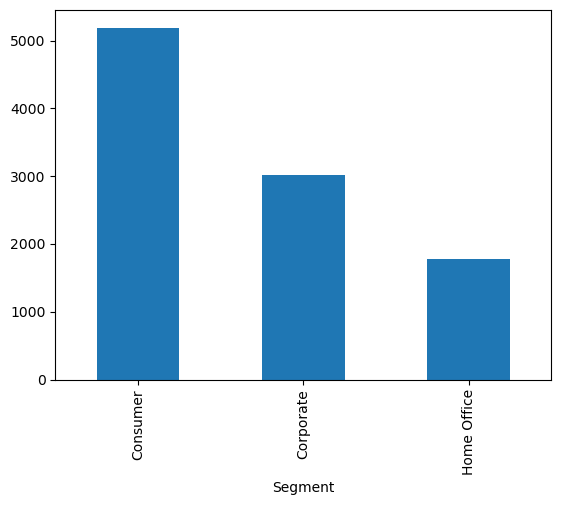

In [124]:
data.groupby('Segment')['Sales'].count().sort_values(ascending=False).head(5).plot(kind='bar')

### **What is the most influential segment in the total profit volume?**

<AxesSubplot:xlabel='Segment'>

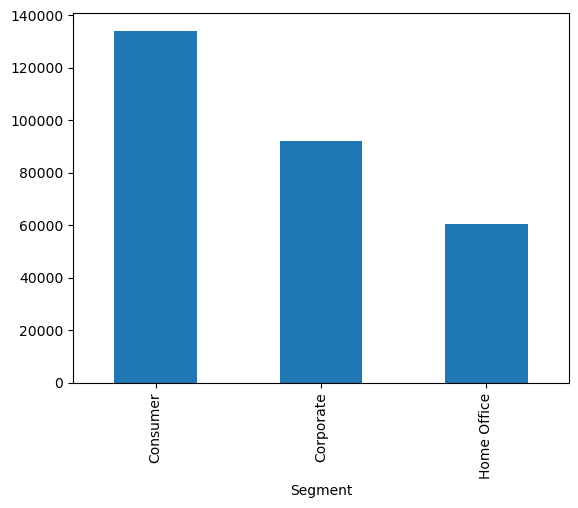

In [125]:
data.groupby('Segment')['Profit'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

### **What is the segment that consumes the most units of different products?**

<AxesSubplot:xlabel='Segment'>

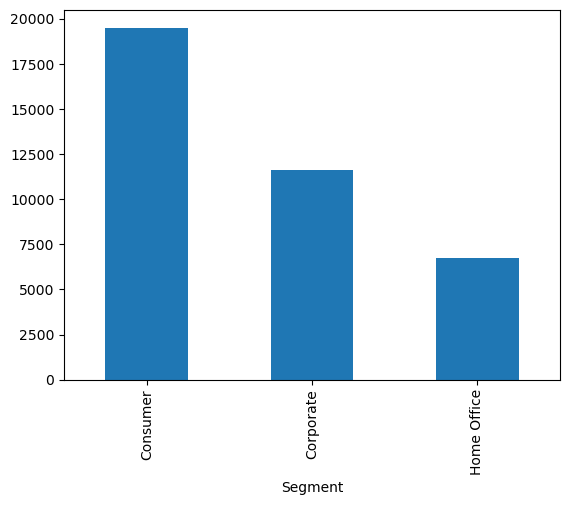

In [126]:
data.groupby('Segment')['Quantity'].sum().sort_values(ascending=False).head(5).plot(kind='bar')

**This contains the distributions of some characteristics, such as profit, sales, discount, and others, on the important property of the segment, and it is concluded that the consumer class is the most functioning layer in all of the previous properties.**

## Part 2: The Recommendations (Some)

1. Starting from the first year up to the last year, sales are increasing steadily, but there was a clear difference between 2016 and 2017 where there was a big jump in the sales rate, and therefore here I recommend looking at the measures that were taken in late 2016 and that were applied In the year 2017 because the results are very good.


2. By looking at the sales rate in the annual quarters of each year, we notice that at the beginning of the first quarter, the sales rate is at its highest level, and therefore I recommend that we take advantage of the discounts on products at the beginning of the year in a limited percentage so that we can push people to spend money,
Because spending money in the last quarter of the year is a must because of the many social events.


3. I recommend increasing the number of stores that sell various office supplies, investing in products such as paper and binders, and focusing on the following products: Storage, Art, and Appliances, because they are witnessing a significant/noticeable increase in recent years, especially in 2017.


4. The western regions, then the eastern regions, are the best places for investment, and therefore we focus on them in the study.


5. There are a number of states that it is better to focus on while making an investment decision, as follows:
The first state: New York State, comes in second place in terms of the number of sales and second place in terms of total profits.
The second state: the state of California, tops first place in terms of the number of sales during the previous survey, and it also tops first place in terms of the volume of profits.
The third state is Washington State.


6. While making the investment decision, there are many cities that we should focus on, as follows:
The first city: New York City, whose sales have the most impact on profits, although in some years it may occupy the second place in terms of the number of sales, and also that city where the discount is not consumed.
The second city: is Los Angeles, a good city for investment and also where the discount is not consumed.
The third city: Seattle, is a promising city and the market in it also accepts investments, and the discount is not consumed.


7. Stay away from cities and states that consume a lot of discounts, because they do not contribute much to profits.
